
This is an example of how to import the dataset used in the paper into Python to apply ordpy (https://arthurpessa.github.io/ordpy/_build/html/index.html).


In [1]:
!pip install ordpy
import numpy as np
import ordpy
from ordpy import renyi_complexity_entropy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import string
import glob
import warnings
import math
from scipy.fft import fft, ifft
from scipy.io import savemat
import matplotlib.colors as mcolors

In [2]:
# Importing the .mat files
import scipy.io
from google.colab import drive

# This will mount your Google Drive to the directory '/content/drive'
drive.mount('/content/drive')

# Now you can load the .mat file
mat = scipy.io.loadmat('/content/drive/MyDrive/IFLP/atlas/MatlabFile.mat') # Replace with the path in your drive

# 'mat' is a dictionary containing the variables from the .mat file



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Print the variable names
for key in mat.keys():
    print(key)

__header__
__version__
__globals__
AgeAtTimeOfStudy
ChannelName
ChannelPosition
ChannelRegion
ChannelType
Data_N2
Data_N3
Data_R
Data_W
FacesLeft
FacesRight
Gender
Hemisphere
NodesLeft
NodesLeftInflated
NodesRegionLeft
NodesRegionRight
NodesRight
NodesRightInflated
Patient
RegionName
SamplingFrequency


In [4]:
# View the shape
import numpy as np

variables = ["__header__", "__version__", "__globals__", "AgeAtTimeOfStudy", "ChannelName", "ChannelPosition", "ChannelRegion", "ChannelType", "Data_N2", "Data_N3", "Data_R", "Data_W", "FacesLeft", "FacesRight", "Gender", "Hemisphere", "NodesLeft", "NodesLeftInflated", "NodesRegionLeft", "NodesRegionRight", "NodesRight", "NodesRightInflated", "Patient", "RegionName", "SamplingFrequency"]

for var in variables:
    if var in mat:
        if isinstance(mat[var], np.ndarray):
            print(f"The shape of {var} is: {mat[var].shape}")
        else:
            print(f"{var} is of type: {type(mat[var])}")
    else:
        print(f"{var} is not found in the .mat file")

__header__ is of type: <class 'bytes'>
__version__ is of type: <class 'str'>
__globals__ is of type: <class 'list'>
The shape of AgeAtTimeOfStudy is: (106, 1)
The shape of ChannelName is: (1772, 1)
The shape of ChannelPosition is: (1772, 3)
The shape of ChannelRegion is: (1772, 1)
The shape of ChannelType is: (1772, 1)
The shape of Data_N2 is: (13600, 1772)
The shape of Data_N3 is: (13600, 1772)
The shape of Data_R is: (13600, 1772)
The shape of Data_W is: (13600, 1772)
The shape of FacesLeft is: (238404, 3)
The shape of FacesRight is: (238460, 3)
The shape of Gender is: (106, 1)
The shape of Hemisphere is: (1772, 1)
The shape of NodesLeft is: (119204, 3)
The shape of NodesLeftInflated is: (119204, 3)
The shape of NodesRegionLeft is: (119204, 1)
The shape of NodesRegionRight is: (119232, 1)
The shape of NodesRight is: (119232, 3)
The shape of NodesRightInflated is: (119232, 3)
The shape of Patient is: (1772, 1)
The shape of RegionName is: (39, 1)
The shape of SamplingFrequency is: (1, 


Here you should implement a method to select the channels you want to compare.

In [5]:
Data_W = mat["Data_W"]

# Accessing channel 1172
channel_1172 = Data_W[:, 1171]

# Indices for region 9 (some patients have multiple channels)
females = [642, 650, 746, 747, 748, 786, 787, 1137, 1138, 1368, 1369, 1370]
males = [431, 432, 433, 434, 460, 466, 467, 468, 469, 1005, 1006, 1226, 1227, 1653, 1702, 1703, 1704, 1707, 1708, 1709, 1710, 1711, 1712]

# Create the renyi_parameter vector
renyi_parameter = np.arange(0.1, 7.1, 0.2)

In this example, it has not been done, but you should remove the empty channels and decide what to do with the NaNs before proceeding.

In [17]:
import numpy as np

# Parameters
D = 6
tau = 1
renyi_parameter = np.arange(0.1, 7.1, 0.1)

# Initialize lists to store the results
RE_females = np.empty((len(females), len(renyi_parameter)))
RC_females = np.empty((len(females), len(renyi_parameter)))
RE_males = np.empty((len(males), len(renyi_parameter)))
RC_males = np.empty((len(males), len(renyi_parameter)))

# Calculate Renyi entropy and complexity for each q parameter in the female group
for i, ind in enumerate(females):
    LFP = Data_W[:, ind]
    for j, q in enumerate(renyi_parameter):
        RE, RC = renyi_complexity_entropy(LFP, q, D, tau)
        RE_females[i, j] = RE
        RC_females[i, j] = RC

# Calculate Renyi entropy and complexity for each q parameter in the male group
for i, ind in enumerate(males):
    LFP = Data_W[:, ind]
    for j, q in enumerate(renyi_parameter):
        RE, RC = renyi_complexity_entropy(LFP, q, D, tau)
        RE_males[i, j] = RE
        RC_males[i, j] = RC

# Calculate the means and standard deviations
promedio_RE_females = np.mean(RE_females, axis=0)
desviacion_RE_females = np.std(RE_females, axis=0)
promedio_RC_females = np.mean(RC_females, axis=0)
desviacion_RC_females = np.std(RC_females, axis=0)

promedio_RE_males = np.mean(RE_males, axis=0)
desviacion_RE_males = np.std(RE_males, axis=0)
promedio_RC_males = np.mean(RC_males, axis=0)
desviacion_RC_males = np.std(RC_males, axis=0)

# Now you have a vector of means and standard deviations for each q

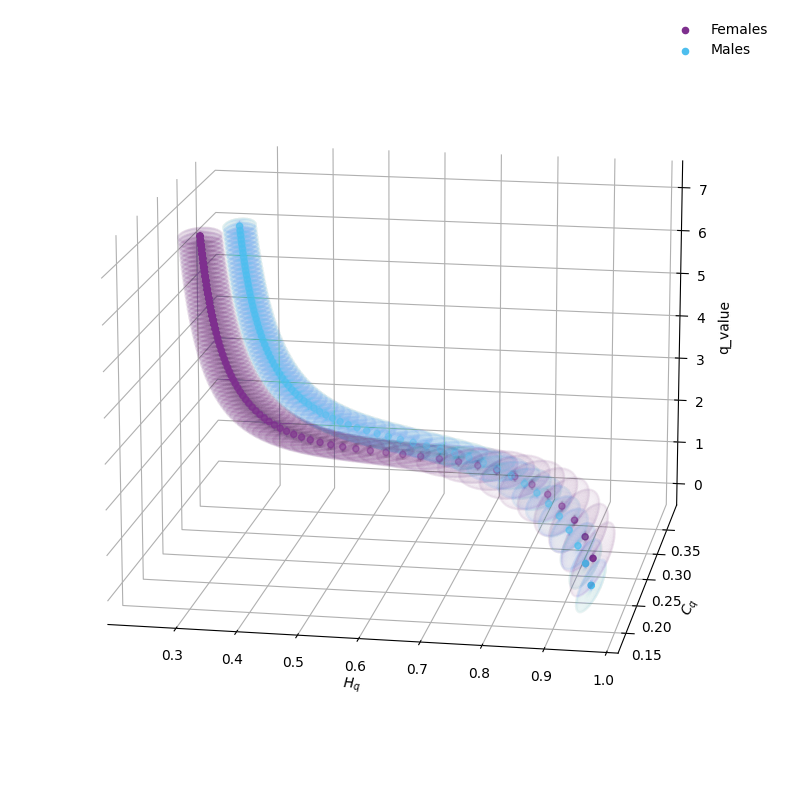

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse

# Create a 3D figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot means
ax.scatter(promedio_RE_females, promedio_RC_females, renyi_parameter, color=[0.4940, 0.1840, 0.5560], label='Females')
ax.scatter(promedio_RE_males, promedio_RC_males, renyi_parameter, color=[0.3010, 0.7450, 0.9330], label='Males')

# Function to draw ellipses with 3D projection
def draw_ellipse(ax, center, width, height, depth, color):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    x = width * np.outer(np.cos(u), np.sin(v))
    y = height * np.outer(np.sin(u), np.sin(v))
    z = depth * np.outer(np.ones(np.size(u)), np.cos(v))

    for i in range(len(x)):
        for j in range(len(x)):
            [x[i, j], y[i, j], z[i, j]] = np.dot([x[i, j], y[i, j], z[i, j]],
                                                  np.array([[np.cos(0), -np.sin(0), 0],
                                                            [np.sin(0), np.cos(0), 0],
                                                            [0, 0, 1]])) + center

    ax.plot_wireframe(x, y, z, color=color, alpha=0.01)

# Add standard deviations as ellipses
for i in range(len(renyi_parameter)):
    # Females
    draw_ellipse(ax, (promedio_RE_females[i], promedio_RC_females[i], renyi_parameter[i]),
                 desviacion_RE_females[i],  desviacion_RC_females[i], 0.1, [0.4940, 0.1840, 0.5560])

    # Males
    draw_ellipse(ax, (promedio_RE_males[i], promedio_RC_males[i], renyi_parameter[i]),
                  desviacion_RE_males[i],  desviacion_RC_males[i], 0.1, [0.3010, 0.7450, 0.9330])

# Labels and legend
ax.set_xlabel('$H_q$')
ax.set_ylabel('$C_q$')
ax.set_zlabel('q_value')
ax.legend(frameon=False)

# Change the background color to white
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.view_init(elev=15, azim=280)

plt.tight_layout()

# Show plot
plt.show()
